In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
...,...,...,...,...,...,...,...,...
6639,1,65,307,42,1,0,1,36.6
6640,1,42,169,56,0,0,0,0.8
6641,0,65,212,35,1,0,0,30.6
6642,0,66,184,39,0,0,0,23.8


In [4]:
df = pd.read_csv('cardio_dataset.csv').values
df

array([[  1. ,  48. , 236. , ...,   1. ,   0. ,   1.1],
       [  0. ,  48. , 260. , ...,   1. ,   1. ,   7. ],
       [  0. ,  44. , 187. , ...,   1. ,   0. ,   7. ],
       ...,
       [  0. ,  65. , 212. , ...,   0. ,   0. ,  30.6],
       [  0. ,  66. , 184. , ...,   0. ,   0. ,  23.8],
       [  1. ,  45. , 203. , ...,   1. ,   0. ,   1. ]])

In [5]:
df.shape

(6644, 8)

In [6]:
data = df[:,0:7]
target = df[:,7:8]

In [7]:
from sklearn.preprocessing import MinMaxScaler

target = np.reshape(target, (-1,1))

scaler_data = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

data_scaled = scaler_data.fit_transform(data)
target_scaled = scaler_target.fit_transform(target)

In [8]:
print(data_scaled)

[[1.         0.20512821 0.40045249 ... 0.         1.         0.        ]
 [0.         0.20512821 0.45475113 ... 0.         1.         1.        ]
 [0.         0.1025641  0.28959276 ... 1.         1.         0.        ]
 ...
 [0.         0.64102564 0.34615385 ... 1.         0.         0.        ]
 [0.         0.66666667 0.28280543 ... 0.         0.         0.        ]
 [1.         0.12820513 0.32579186 ... 0.         1.         0.        ]]


In [9]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data_scaled,target_scaled,test_size=0.2)

In [10]:
# from keras.models import Sequential
# from keras.layers import Dense,Dropout

# model = Sequential()
# model.add(Dense(128,input_dim=7, activation='sigmoid',kernel_initializer='normal'))
# model.add(Dropout(0.5))
# model.add(Dense(64,activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(10,activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128, input_dim=7, activation='sigmoid',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

C:\Users\supun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,941 (38.83 KB)

 Trainable params: 9,941 (38.83 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback):

    def on_epoch_end(self,epoch,logs=None):
        predicted_result=model.predict(test_data)
        r2=r2_score(test_target,predicted_result)
        print('epoch',epoch,'- r2 score:',r2)

In [12]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'model/model-{epoch:03d}.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='auto'
)

In [13]:
history=model.fit(train_data,train_target,epochs=200,validation_data = (test_data,test_target),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step   - loss: 0.0541 - mae: 0.1749 - mse: 
epoch 0 - r2 score: 0.02674374217883624
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0536 - mae: 0.1739 - mse: 0.0536 - val_loss: 0.0228 - val_mae: 0.1166 - val_mse: 0.0228
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - loss: 0.0248 - mae: 0.1220 - mse: 0.0
epoch 1 - r2 score: 0.008403403008940824
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0248 - mae: 0.1218 - mse: 0.0248 - val_loss: 0.0232 - val_mae: 0.1105 - val_mse: 0.0232
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - loss: 0.0231 - mae: 0.1144 - mse: 0.0
epoch 2 - r2 score: 0.05475801778756262
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0231 - mae: 0.1146 - mse: 0.0231 - val_loss: 0.0221 - val_mae: 0.1135 - val_mse: 0.0221
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - loss: 0.0221 - mae: 0.1132 - mse: 0.0
epoch 3 - r2 score: 0.11126991191358548
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.

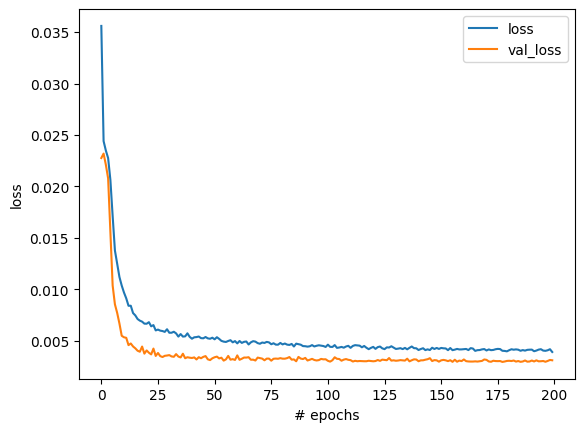

In [14]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [15]:
import joblib
joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_data,'target_data.sav')

['target_data.sav']

In [37]:
output = model.predict(np.array([[1, 50, 200, 40, 142, 0, 0]]))

risk_percent = np.clip(output[0][0], 0, 1) * 100
print(f"Heart Disease Risk: {risk_percent:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Heart Disease Risk: 81.32%
